<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-08-28 01:01:07--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  58.0MB/s    in 2.6s    

2025-08-28 01:01:10 (58.0 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



In [4]:
import sqlite3
conn = sqlite3.connect("survey-results-public.sqlite")

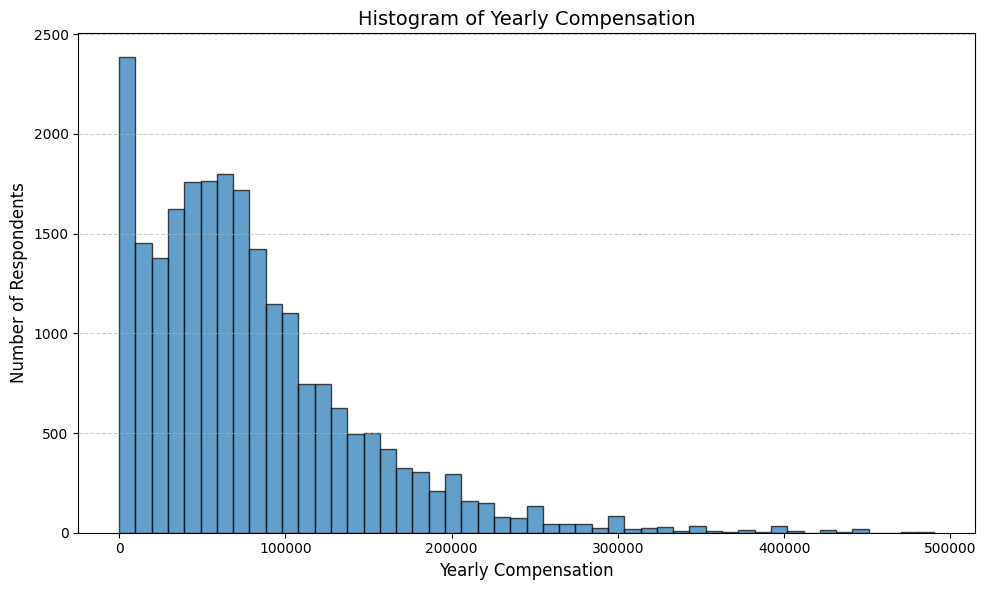

In [17]:
## Write your code here
query = "SELECT ConvertedCompYearly FROM main"
df = pd.read_sql_query(query, conn)

comp_data = df["ConvertedCompYearly"].dropna()
comp_data = comp_data[comp_data < 500000]

plt.figure(figsize=(10,6))
plt.hist(comp_data, bins=50, color="#1f77b4", edgecolor="black", alpha=0.7)
plt.title("Histogram of Yearly Compensation", fontsize=14)
plt.xlabel("Yearly Compensation", fontsize=12)
plt.ylabel("Number of Respondents", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



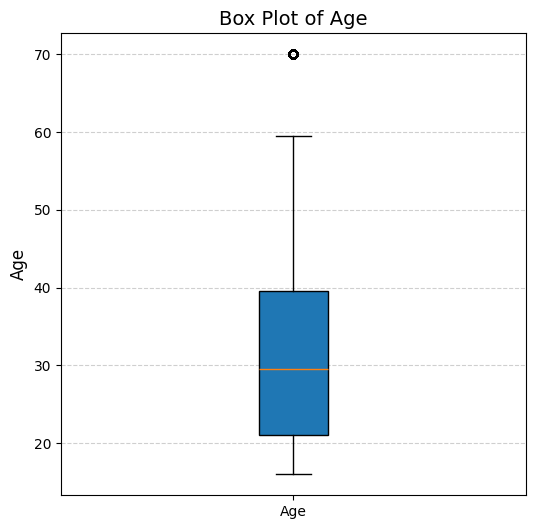

In [14]:
## Write your code here
query = "SELECT Age FROM main"
df = pd.read_sql_query(query, conn)

age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['Age_numeric'] = df['Age'].map(age_mapping)

age_data = df["Age_numeric"].dropna()

plt.figure(figsize=(6,6))
plt.boxplot(age_data, vert=True, patch_artist=True, tick_labels=["Age"])
plt.title("Box Plot of Age", fontsize=14)
plt.ylabel("Age", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



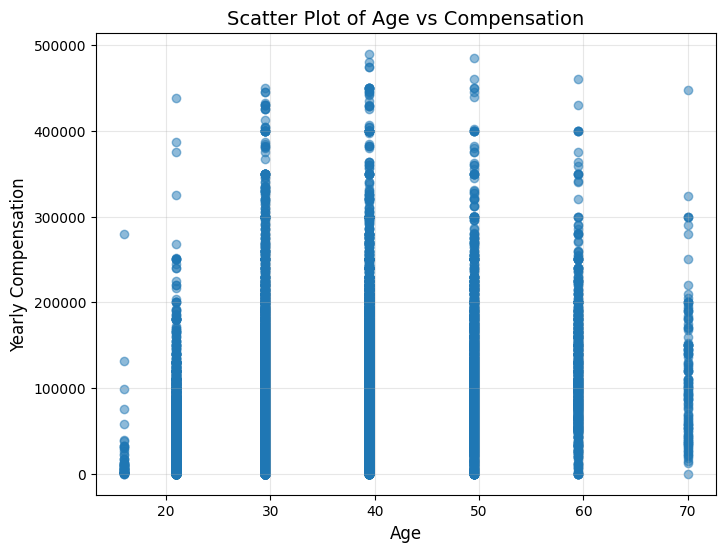

In [18]:
## Write your code here
query = "SELECT Age, ConvertedCompYearly FROM main"
df = pd.read_sql_query(query, conn)

age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['Age_numeric'] = df['Age'].map(age_mapping)
df = df[df['ConvertedCompYearly'] < 500000]

df = df.dropna(subset=['Age_numeric', 'ConvertedCompYearly'])

plt.figure(figsize=(8,6))
plt.scatter(df['Age_numeric'], df['ConvertedCompYearly'], alpha=0.5)
plt.title("Scatter Plot of Age vs Compensation", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Yearly Compensation", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


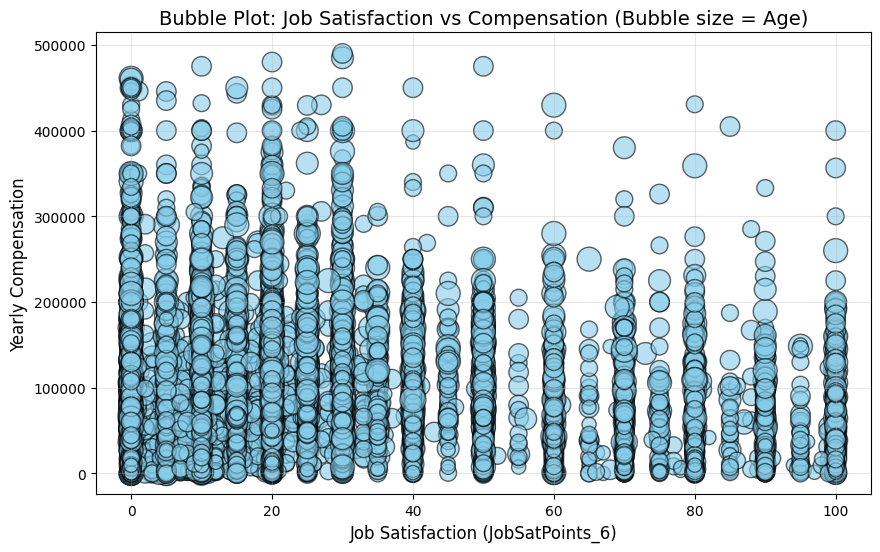

In [32]:
## Write your code here
query = "SELECT Age, ConvertedCompYearly, JobSatPoints_6 FROM main"
df = pd.read_sql_query(query, conn)

age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['Age_numeric'] = df['Age'].map(age_mapping)

df = df.dropna(subset=['Age_numeric', 'ConvertedCompYearly', 'JobSatPoints_6'])
df = df[df['ConvertedCompYearly'] < 500000]

plt.figure(figsize=(10,6))
plt.scatter(
    df['JobSatPoints_6'], 
    df['ConvertedCompYearly'], 
    s=bubble_sizes, 
    alpha=0.6, 
    c='skyblue', 
    edgecolors='k'
)
plt.title("Bubble Plot: Job Satisfaction vs Compensation (Bubble size = Age)", fontsize=14)
plt.xlabel("Job Satisfaction (JobSatPoints_6)", fontsize=12)
plt.ylabel("Yearly Compensation", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



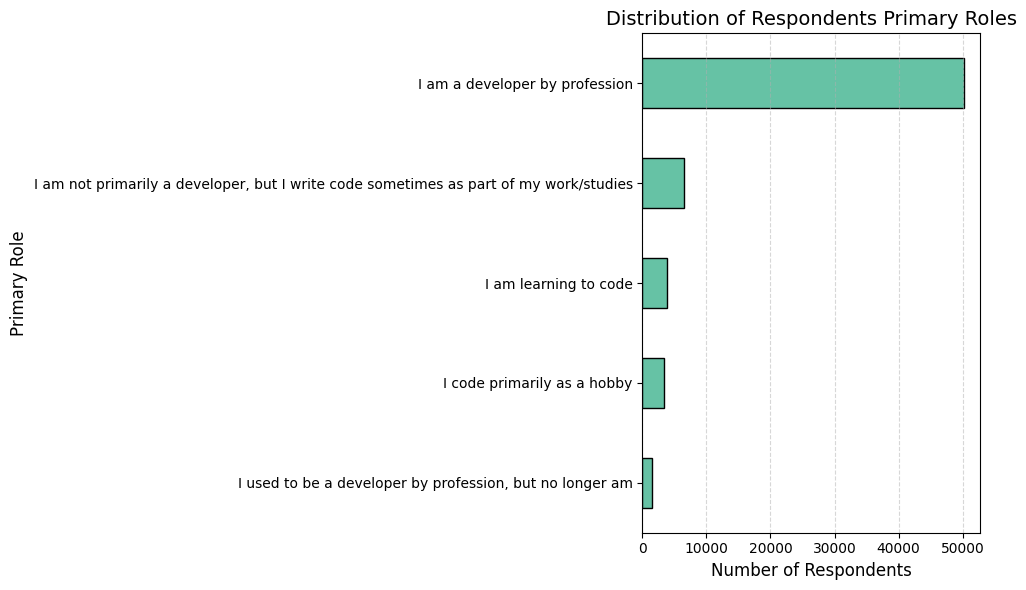

In [38]:
## Write your code here
query = "SELECT MainBranch FROM main"
df = pd.read_sql_query(query, conn)

df = df.dropna(subset=['MainBranch'])
branch_counts = df['MainBranch'].value_counts()

plt.figure(figsize=(10,6))
branch_counts.plot(kind='barh', color="#66c2a5", edgecolor="k")
plt.title("Distribution of Respondents Primary Roles", fontsize=14)
plt.xlabel("Number of Respondents", fontsize=12)
plt.ylabel("Primary Role", fontsize=12)
plt.gca().invert_yaxis() 
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



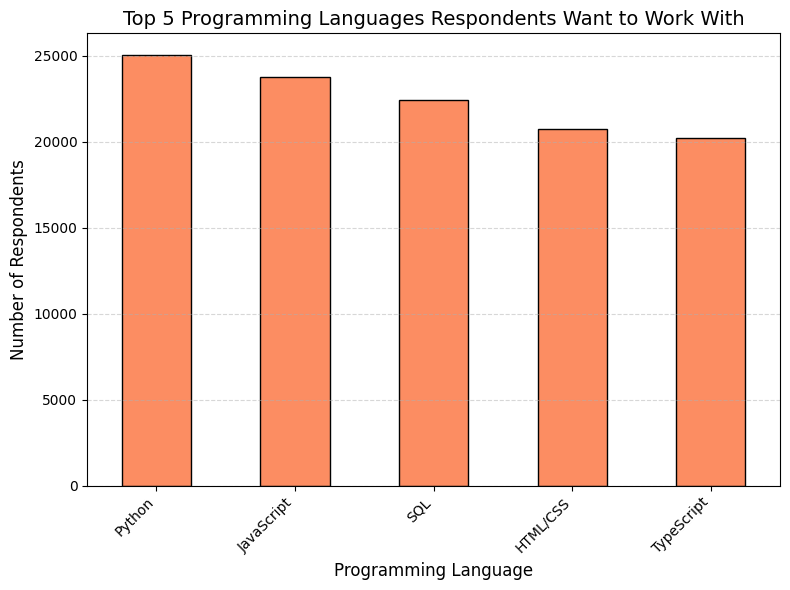

In [40]:
## Write your code here
query = "SELECT LanguageWantToWorkWith FROM main"
df = pd.read_sql_query(query, conn)

df = df.dropna(subset=['LanguageWantToWorkWith'])

df['LanguageWantToWorkWith'] = df['LanguageWantToWorkWith'].str.split(';')
df = df.explode('LanguageWantToWorkWith')
df['LanguageWantToWorkWith'] = df['LanguageWantToWorkWith'].str.strip()

top_languages = df['LanguageWantToWorkWith'].value_counts().nlargest(5)

plt.figure(figsize=(8,6))
top_languages.plot(kind='bar', color="#fc8d62", edgecolor="k")
plt.title("Top 5 Programming Languages Respondents Want to Work With", fontsize=14)
plt.xlabel("Programming Language", fontsize=12)
plt.ylabel("Number of Respondents", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


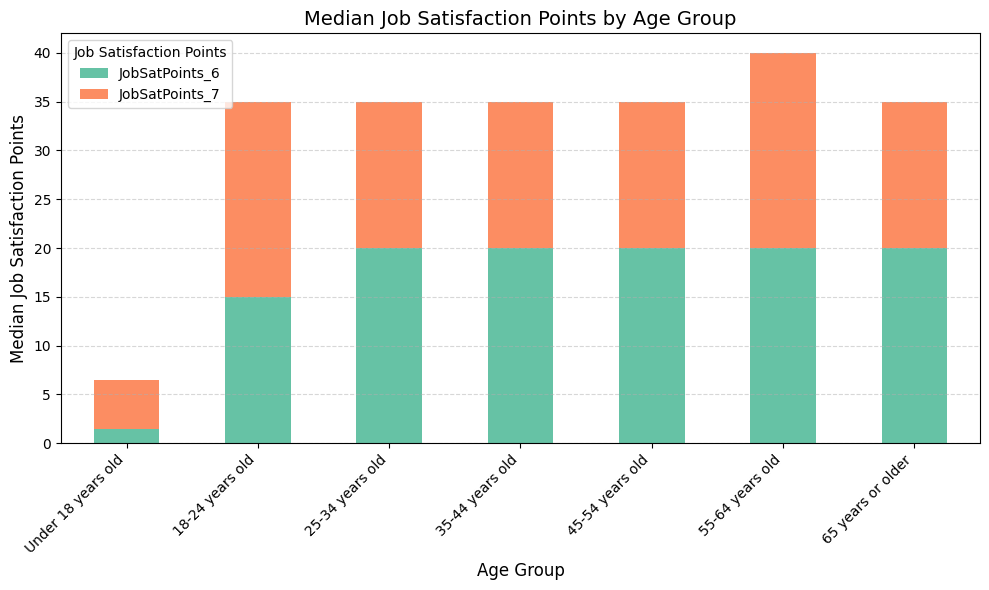

In [44]:
## Write your code here
query = "SELECT Age, JobSatPoints_6, JobSatPoints_7 FROM main"
df = pd.read_sql_query(query, conn)

df = df.dropna(subset=['Age', 'JobSatPoints_6', 'JobSatPoints_7'])
df = df[df['Age'] != 'Prefer not to say']

age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]

median_df = df.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()
median_df = median_df.reindex(age_order)

median_df.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    color=["#66c2a5", "#fc8d62"]
)
plt.title("Median Job Satisfaction Points by Age Group", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Median Job Satisfaction Points", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Job Satisfaction Points")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



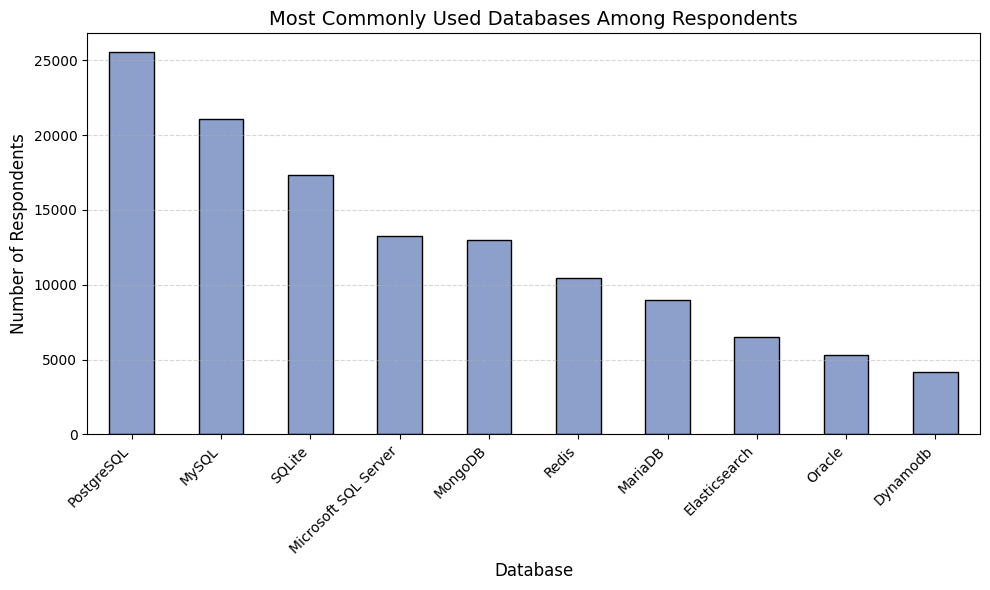

In [45]:
## Write your code here
query = "SELECT DatabaseHaveWorkedWith FROM main"
df = pd.read_sql_query(query, conn)

df = df.dropna(subset=['DatabaseHaveWorkedWith'])

df['DatabaseHaveWorkedWith'] = df['DatabaseHaveWorkedWith'].str.split(';')
df = df.explode('DatabaseHaveWorkedWith')
df['DatabaseHaveWorkedWith'] = df['DatabaseHaveWorkedWith'].str.strip()

db_counts = df['DatabaseHaveWorkedWith'].value_counts()
top_dbs = db_counts.nlargest(10)

plt.figure(figsize=(10,6))
top_dbs.plot(kind='bar', color="#8da0cb", edgecolor="k")
plt.title("Most Commonly Used Databases Among Respondents", fontsize=14)
plt.xlabel("Database", fontsize=12)
plt.ylabel("Number of Respondents", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



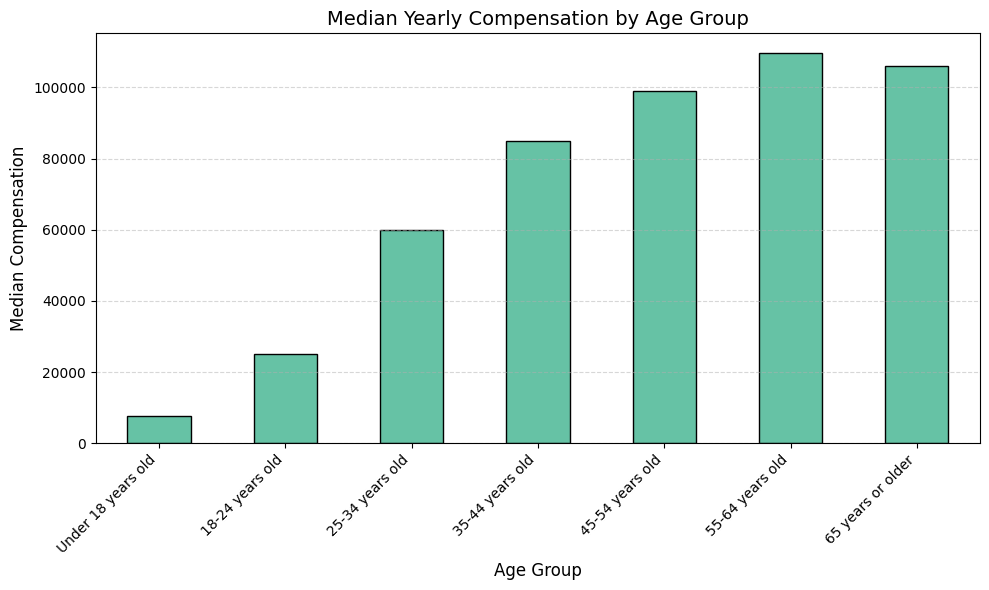

In [46]:
## Write your code here
query = "SELECT Age, ConvertedCompYearly FROM main"
df = pd.read_sql_query(query, conn)

df = df.dropna(subset=['Age', 'ConvertedCompYearly'])
df = df[df['Age'] != 'Prefer not to say']

age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]

median_comp = df.groupby('Age')['ConvertedCompYearly'].median().reindex(age_order)

plt.figure(figsize=(10,6))
median_comp.plot(kind='bar', color="#66c2a5", edgecolor="k")
plt.title("Median Yearly Compensation by Age Group", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Median Compensation", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



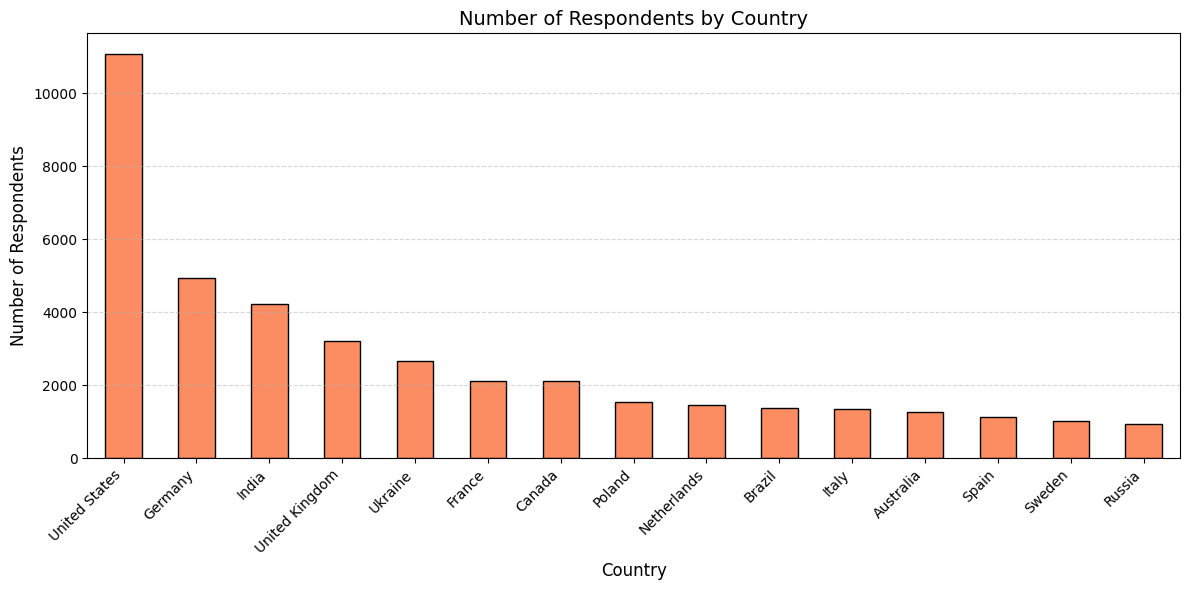

In [54]:
## Write your code here
query = "SELECT Country FROM main"
df = pd.read_sql_query(query, conn)

country_mapping = {
    'United States of America': 'United States',
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    'Russian Federation': 'Russia'
}
df["Country"] = df["Country"].replace(country_mapping)

df = df.dropna(subset=['Country'])

country_counts = df['Country'].value_counts()
top_countries = country_counts.nlargest(15)

plt.figure(figsize=(12,6))
top_countries.plot(kind='bar', color="#fc8d62", edgecolor="k")
plt.title("Number of Respondents by Country", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Respondents", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


In [55]:
conn.close()

## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
